Vertebral Column Data Set

Name: Athirai Shanmugam

Github: athirai-s

USC ID: 9720978399

(a) Download and load data

In [20]:
import pandas as pd
import numpy as np
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


(b) Pre-Processing and Exploratory data analysis:

In [21]:
#read the data from the dataset folder
data, metadata = arff.loadarff("../data/column_2C_weka.arff")

#create dataframe using pd
df = pd.DataFrame(data)

df['class'] = df['class'].str.decode('utf-8')
class_map = {'Normal': 0, 'Abnormal': 1}
df['class'] = df['class'].map(class_map)
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


(i) Scatterplot

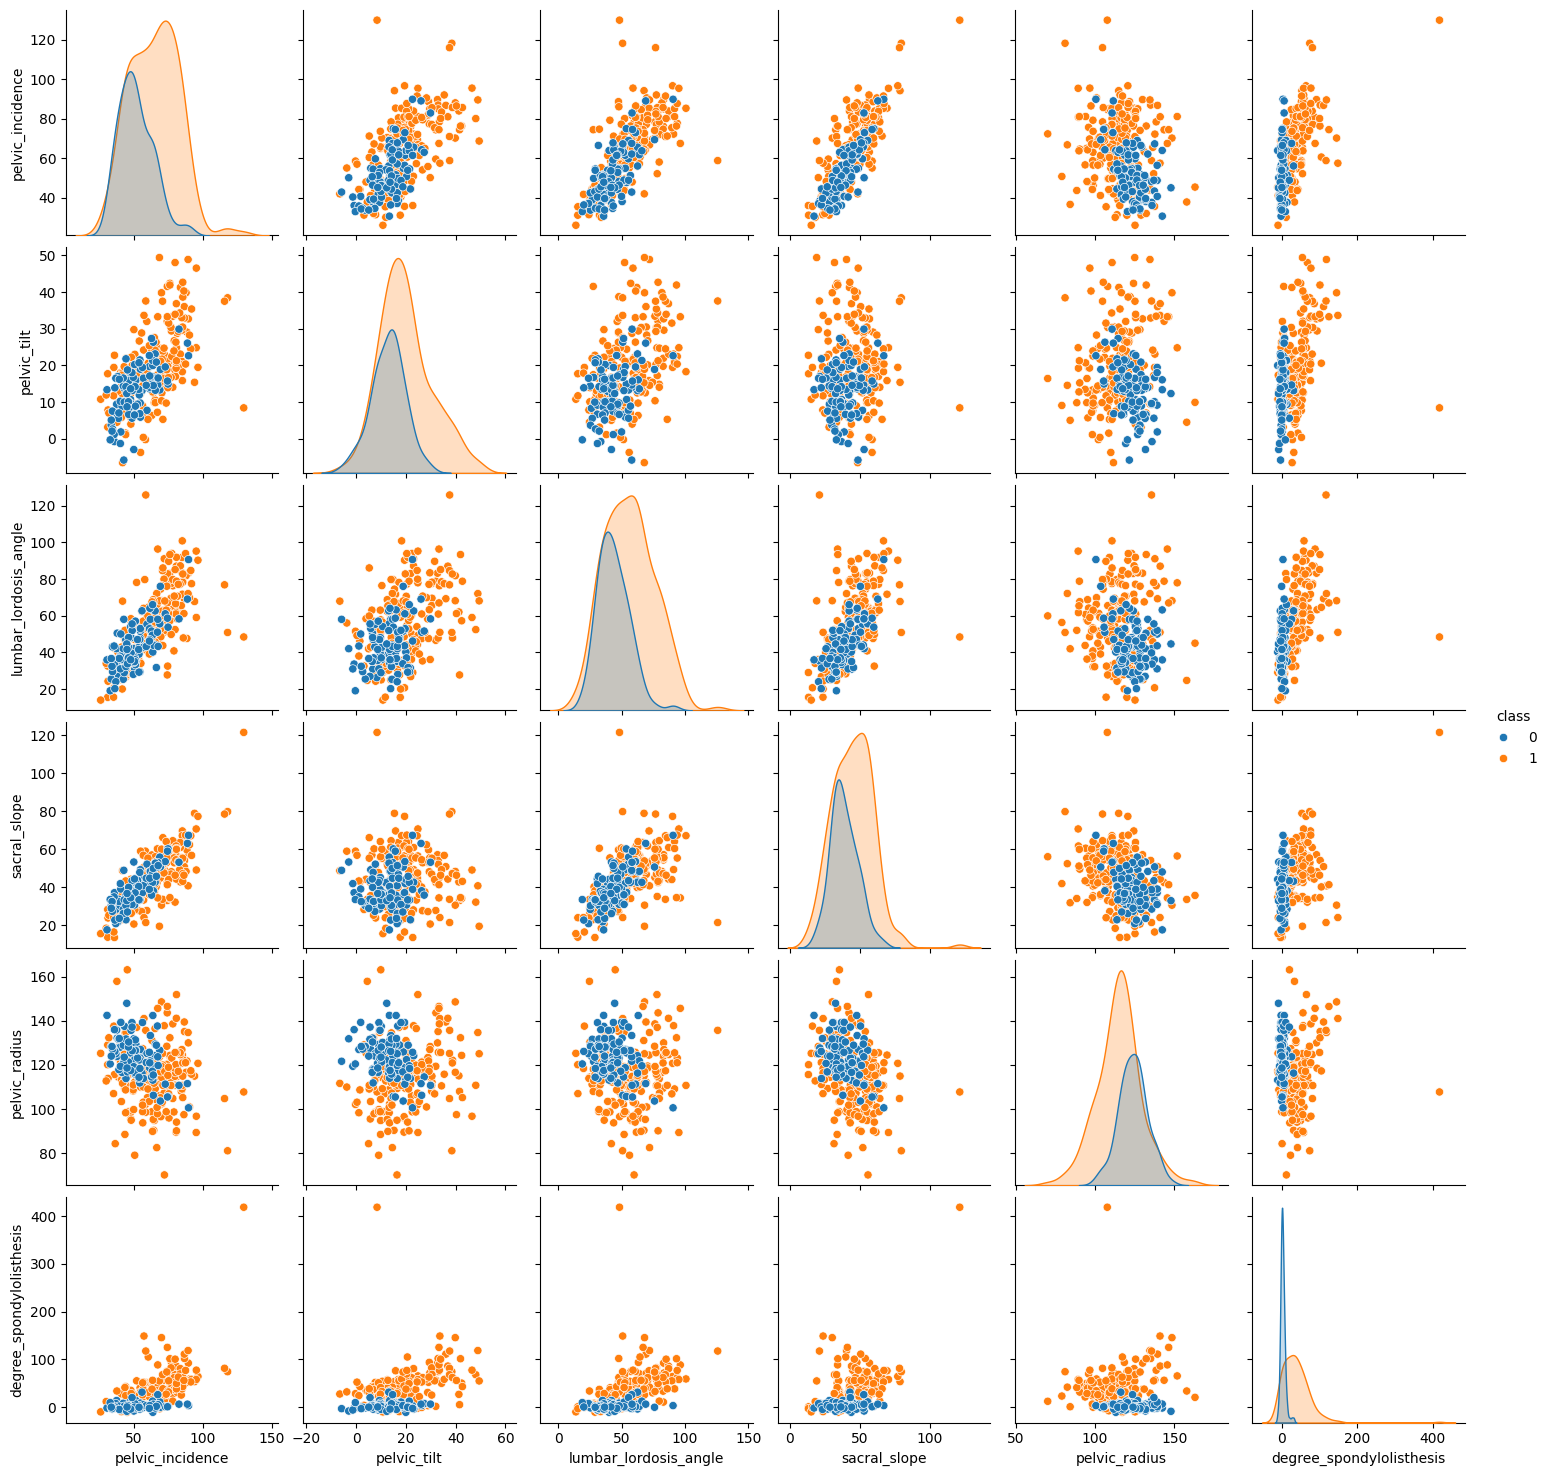

In [22]:
sns.pairplot(data=df,hue='class')
plt.show()

(ii) Boxplots

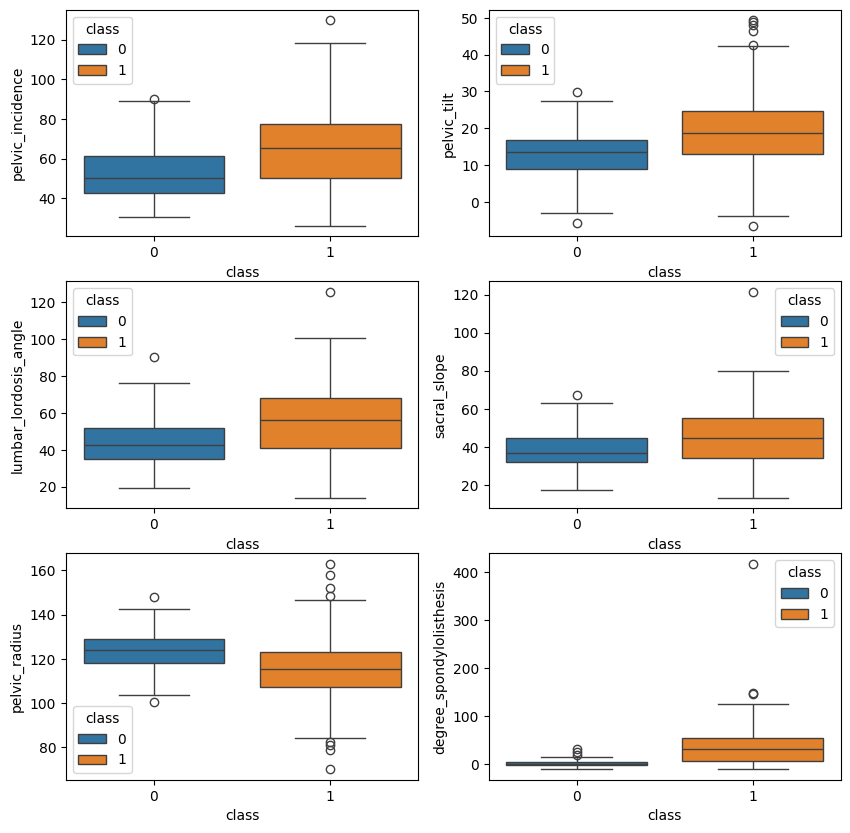

In [23]:
#showing boxplots using seaborn

figure = plt.figure(figsize=(10,10))
ax1 = figure.add_subplot(3, 2, 1)
ax2 = figure.add_subplot(3, 2, 2)
ax3 = figure.add_subplot(3, 2, 3)
ax4 = figure.add_subplot(3, 2, 4)
ax5 = figure.add_subplot(3, 2, 5)
ax6 = figure.add_subplot(3, 2, 6)


sns.boxplot(data=df, x='class', y='pelvic_incidence', hue='class', ax=ax1, dodge=False)
sns.boxplot(data=df, x='class', y='pelvic_tilt', hue='class', ax=ax2, dodge=False)
sns.boxplot(data=df, x='class', y='lumbar_lordosis_angle', hue='class', ax=ax3, dodge=False)
sns.boxplot(data=df, x='class', y='sacral_slope', hue='class', ax=ax4, dodge=False)
sns.boxplot(data=df, x='class', y='pelvic_radius', hue='class', ax=ax5, dodge=False)
sns.boxplot(data=df, x='class', y='degree_spondylolisthesis', hue='class', ax=ax6, dodge=False)

plt.show()

(iii) Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set

In [24]:
features = ['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope',
            'pelvic_radius','degree_spondylolisthesis']

normal_training_data = df[df['class'] == 0].iloc[:70]
normal_testing_data = df[df['class'] == 0].iloc[70:]

abnormal_training_data = df[df['class'] == 1].iloc[:140]
abnormal_testing_data = df[df['class'] == 1].iloc[140:]

training_data = pd.concat([normal_training_data, abnormal_training_data])
training_data = training_data.sample(frac=1)

testing_data = pd.concat([normal_testing_data, abnormal_testing_data])
testing_data = testing_data.sample(frac=1)

x_train = training_data[features]
x_test = testing_data[features]

y_train = training_data['class']
y_test = testing_data['class']

(c) Classiffication using KNN

i. Eucledian Metric

In [25]:
k_values = list(range(1,209,3))
training_err = []
testing_err = []

for k in k_values:
    n = KNeighborsClassifier(n_neighbors=k)
    n.fit(x_train, y_train.values.ravel())

    training_acc = n.score(x_train, y_train)
    testing_acc = n.score(x_test, y_test)

    training_err.append(1 - training_acc)
    testing_err.append(1 - testing_acc)

(ii) # Plot training/testing against k

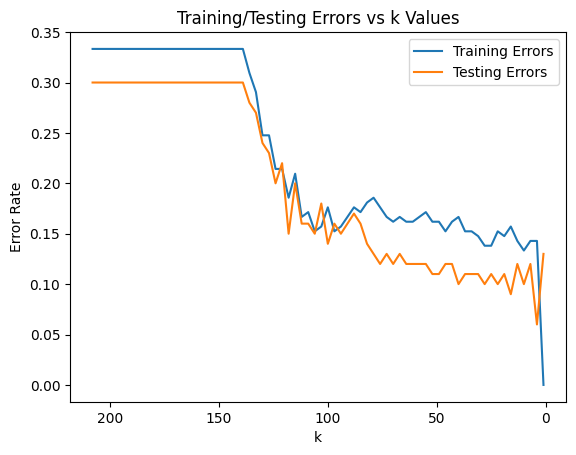

The optimal k* is 4 with the lowest test error.


In [26]:
# Plot training/testing against k
plt.plot(k_values, training_err, label='Training Errors')
plt.plot(k_values, testing_err, label='Testing Errors')
plt.title('Training/Testing Errors vs k Values')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.legend(loc='upper right')

plt.gca().invert_xaxis() # decreasing k
plt.show()

# Find optimal k*
opt_id = np.argmin(testing_err)
opt_k = k_values[opt_id]
print(f'The optimal k* is {opt_k} with the lowest test error.')

The k* is 4 as it provides the minimum test error(orange).

In [27]:
# k-nearest neighbors (k*=4)
opt_k = KNeighborsClassifier(n_neighbors=4) 
opt_k.fit(x_train, y_train.values.ravel())
predictions = opt_k.predict(x_test)

#confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predictions) 
true_neg = confusion_matrix[0][0]
false_neg = confusion_matrix[1][0]
true_pos = confusion_matrix[1][1]
false_pos = confusion_matrix[0][1]
#true positive
true_pos_rate = true_pos/(true_pos+false_neg) 
#true negative
true_neg_rate = true_neg/(true_neg+false_pos) 
#precision score
precision_score = metrics.precision_score(y_test, predictions) 
#F1-score
f1_score = metrics.f1_score(y_test, predictions) 

print('Confusion matrix: \n', confusion_matrix)
print('True positive rate:', true_pos_rate)
print('True negative rate:', true_neg_rate)
print('Precision score:', precision_score)
print('F1-score:', f1_score)

Confusion matrix: 
 [[25  5]
 [ 1 69]]
True positive rate: 0.9857142857142858
True negative rate: 0.8333333333333334
Precision score: 0.9324324324324325
F1-score: 0.9583333333333334


Based on these metrics we can say that the statistical model is strong. But since the true negative is around (0.83), this means that in terms of errors this model is more susceptible to more false postives.

iii. Learning Curve

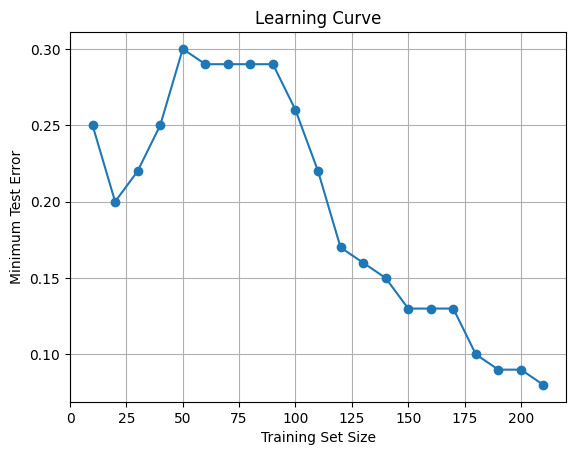

In [28]:
#Plot best test error rate (learning curve)

training_size = range(10, 211, 10)
min_testing_err = {}

for size in training_size: 
    sub_size = size//3
    sub_normal_train = normal_training_data.iloc[:sub_size]
    sub_abnormal_train = abnormal_training_data.iloc[:size - sub_size]
    training_set = pd.concat([sub_normal_train, sub_abnormal_train])
    training_set.sample(frac=1)

    sub_x_train = training_set[features]
    sub_y_train = training_set['class']

    k_vals = range(1, size, 5)

    min_err = min(
        1 - KNeighborsClassifier(k).fit(sub_x_train, sub_y_train).score(x_test, y_test)
        for k in k_vals
    )

    min_testing_err[size] = min_err

# Plotting learning curve
plt.plot(training_size, min_testing_err.values(), marker='o')
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Minimum Test Error")
plt.grid(True)
plt.show()

(d) Other Metrics

i. Minkowski Distance

A. Manhattan Distance with p = 1

In [31]:
#k-nearest neighbors with Manhattan distance

k_val = list(range(1, 197, 5))
testing_err_man = []

for k in k_val:
    N_man = KNeighborsClassifier(n_neighbors=k, p=1)  # Manhattan distance
    N_man.fit(x_train, y_train.values.ravel())
    testing_error = 1 - N_man.score(x_test, y_test)
    testing_err_man.append(testing_error)

# Find and print the best k and test error
min_err = min(testing_err_man)

for k in range(len(testing_err_man)):
    if testing_err_man[k] == min_err:
        print('Manhattan optimal k =', k_val[k], 'testing error =', testing_err_man[k])

table_testing_err = {'Manhattan Distance': min_err}

Manhattan optimal k = 1 testing error = 0.10999999999999999
Manhattan optimal k = 6 testing error = 0.10999999999999999
Manhattan optimal k = 11 testing error = 0.10999999999999999
Manhattan optimal k = 26 testing error = 0.10999999999999999


Due to lowest testing error at multiple k, select k=6 as optimal k as it is the lowest k that is not 1 (if k=1, training set is memorized/perfectly-mapped rather than used to learn patterns). Due to this, k=6 is optimal for Manhattan.

B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [32]:
# k-nearest neighbors with log10(p) ∈ {0.1,0.2,0.3,...,1}

# Initialize p values based on log10(p)
import math

p_values = [10 ** i for i in np.linspace(0.1, 1.0, 10)]
testing_err = list()

for p in p_values:
    N_log_man = KNeighborsClassifier(n_neighbors=6, p=p) # Manhattan optimal k = 6
    N_log_man.fit(x_train, y_train.values.ravel())
    testing_err.append(1 - N_log_man.score(x_test, y_test))

for e in range(len(testing_err)):
    if testing_err[e] == min(testing_err):
        print('p =', p_values[e], 'testing error =', testing_err[e])
        print('The optimal log10(p) =', math.log10(p_values[e]))

table_testing_err['Log Manhattan Distance'] = min(testing_err)

p = 3.9810717055349722 testing error = 0.06000000000000005
The optimal log10(p) = 0.6


C. Chebyshev Distance With p -> infinity

In [33]:
#k-nearest neighbors with Chebyshev distance

cheb_testing_err = list()

for k in k_val:
    N_cheb = KNeighborsClassifier(n_neighbors=k, p=math.inf)
    N_cheb.fit(x_train, y_train.values.ravel())
    cheb_testing_err.append(1 - N_cheb.score(x_test, y_test))

for i in range(len(cheb_testing_err)):
    if cheb_testing_err[i] == min(cheb_testing_err):
        print('Chebyshev optimal k =', k_val[i], 'testing error =', cheb_testing_err[i])
        table_testing_err['Chebyshev Distance'] = cheb_testing_err[i]

Chebyshev optimal k = 16 testing error = 0.07999999999999996


ii. Mahalanobis Distance.

In [37]:
#Compute covariance matrix and its pseudo-inverse
pseudo_inverse = np.linalg.pinv(np.cov(x_train, rowvar=False))
testing_err = []

#Run kNN with Mahalanobis distance
for k in k_val:
    N_maha = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': pseudo_inverse})
    N_maha.fit(x_train, y_train.values.ravel())
    testing_err.append(1 - N_maha.score(x_test, y_test))

#Get best k and corresponding error
min_id = np.argmin(testing_err)
min_k = k_val[min_id]
min_err = testing_err[min_id]

print('Mahalanobis optimal k =', min_k, 'testing error =', min_err)

#result
table_testing_err['Mahalanobis Distance'] = min_err

#Display table of optimal testing error when k=k* for all metrics
pd.DataFrame(table_testing_err.items(), columns=['Metric', 'TestingError'])




Mahalanobis optimal k = 1 testing error = 0.15000000000000002


,Metric,TestingError
0,Manhattan Distance,0.11
1,Log Manhattan Distance,0.06
2,Chebyshev Distance,0.08
3,Mahalanobis Distance,0.15


In this table, we can see the optimal testing errors for each metric using non-weighted voting. The highest training error comes from using Mahalanobis distance while the lowest training error comes from using log Manhattan distance followed by Chebyshev distance.

(e) Weighted Decision

In [38]:
testing_err = list()

for k in k_val:
    W = KNeighborsClassifier(n_neighbors=k, weights='distance')
    W.fit(x_train, y_train.values.ravel())
    training_err = W.score(x_test, y_test)
    testing_err.append(1-training_err)

for i in range(len(testing_err)):
    if testing_err[i] == min(testing_err):
        print('Euclidian optimal k =', k_val[i], 'testing error =', testing_err[i])

#Manhattan
testing_err_man = []

for k in k_val:
    W_man = KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)  #Manhattan distance
    W_man.fit(x_train, y_train.values.ravel())
    testing_err = 1 - W_man.score(x_test, y_test)
    testing_err_man.append(testing_err)

for i in range(len(testing_err_man)):
    if testing_err_man[i] == min(testing_err_man):
        print('Manhattan optimal k =', k_val[i], 'testing error =', testing_err_man[i])

#Chebyshev
cheb_testing_err = list()

for k in k_val:
    N_cheb = KNeighborsClassifier(n_neighbors=k, weights='distance', p=math.inf)
    N_cheb.fit(x_train, y_train.values.ravel())
    cheb_testing_err.append(1 - N_cheb.score(x_test, y_test))

for i in range(len(cheb_testing_err)):
    if cheb_testing_err[i] == min(cheb_testing_err):
        print('Chebyshev optimal k =', k_val[i], 'testing error =', cheb_testing_err[i])

Euclidian optimal k = 6 testing error = 0.09999999999999998
Manhattan optimal k = 26 testing error = 0.09999999999999998
Chebyshev optimal k = 16 testing error = 0.10999999999999999
Chebyshev optimal k = 31 testing error = 0.10999999999999999
Chebyshev optimal k = 36 testing error = 0.10999999999999999
Chebyshev optimal k = 41 testing error = 0.10999999999999999
Chebyshev optimal k = 61 testing error = 0.10999999999999999


As we can see from the results of weighted decision models:

=> optimal k for Euclidian is k=6 with a testing error of 0.09999999999999998

=> optimal k for Manhattan is k=26 with a testing error of 0.09999999999999998

=> optimal k for Chebyshev is k=16 (lowest k) with a testing error of 0.10999999999999999

(f) Testing/Training Error Rate

The lowest testing error rate achieved from weighted decision models is at both k=6 (Euclidian) and k=26 (Manhattan) with a testing error of 0.09999999999999998.

Since k=6 is the lowest, we can select optimal k=6 for lowest testing error rate across all models.

Lowest training error rate, however, is at k=1 as the training set would be perfectly mapped and classified (since the cpu simply matches input to label for each instance, there is no training error).

References/Citations:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html https://www.geeksforgeeks.org/difference-between-score-and-accuracy_score-methods-in-scikit-learn/ https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

https://stackoverflow.com/questions/77615883/attributeerror-flags-object-has-no-attribute-c-contiguous https://stackoverflow.com/questions/59862791/knn-mahalanobis-error-size-of-v-does-not-match-python https://www.geeksforgeeks.org/reading-dat-file-in-python/